In [34]:
import numpy as np
import nibabel as nib
import sys
sys.path.insert(1, '/export03/data/opt/hippunfold_toolbox/hippunfold_toolbox')
# sys.path.insert(1, '/host/cassio/export03/data/opt/hippunfold_toolbox/hippunfold_toolbox')
import plotting
import utils
import importlib

/data/mica3/BIDS_MICs/derivatives/hippunfold_v1.3.0/hippunfold/sub-HC002/ses-01/surf/sub-HC002_ses-01_hemi-L_space-T1w_den-0p5mm_label-dentate_*thickness*.shape.gii failed
/data/mica3/BIDS_MICs/derivatives/hippunfold_v1.3.0/hippunfold/sub-HC002/ses-01/surf/sub-HC002_ses-01_hemi-L_space-T1w_den-0p5mm_label-dentate_*subfields*.label.gii failed
/data/mica3/BIDS_MICs/derivatives/hippunfold_v1.3.0/hippunfold/sub-HC002/ses-01/surf/sub-HC002_ses-01_hemi-R_space-T1w_den-0p5mm_label-dentate_*thickness*.shape.gii failed
/data/mica3/BIDS_MICs/derivatives/hippunfold_v1.3.0/hippunfold/sub-HC002/ses-01/surf/sub-HC002_ses-01_hemi-R_space-T1w_den-0p5mm_label-dentate_*subfields*.label.gii failed


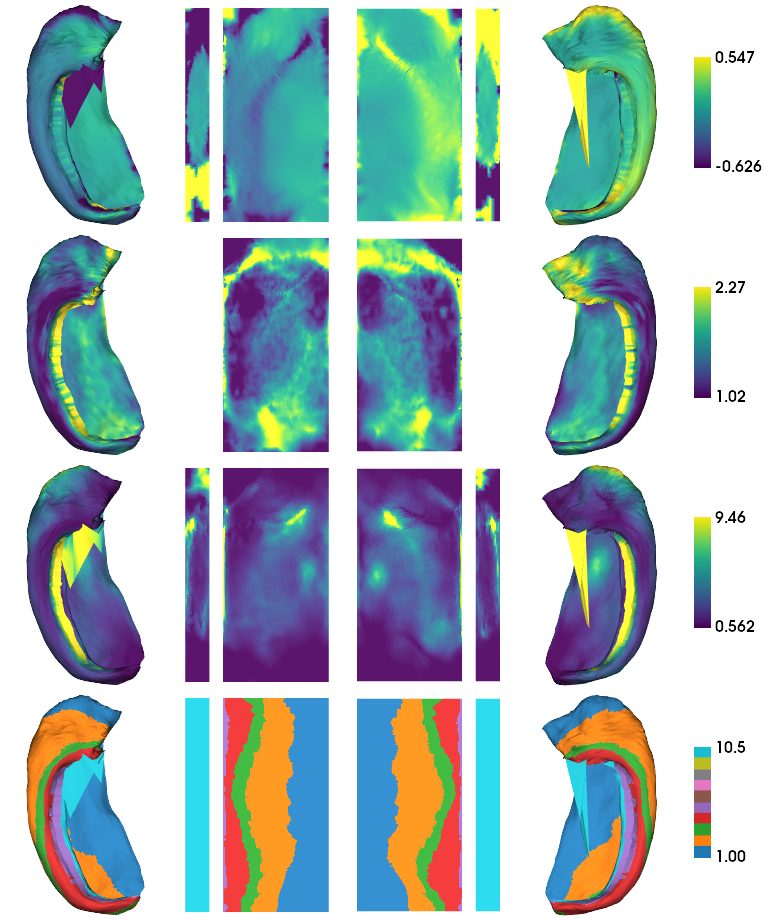

In [35]:
hippunfold_dir = '/data/mica3/BIDS_MICs/derivatives/hippunfold_v1.3.0/hippunfold'
sub = 'HC002'
ses='01'
features = ['curvature', 'thickness', 'gyrification', 'subfields']
resourcesdir = '/export03/data/opt/hippunfold_toolbox/resources'
modality = 'T1w'
import importlib
importlib.reload(utils)
importlib.reload(plotting)

plotting.surfplot_sub_foldunfold(hippunfold_dir, sub, ses, features, embed_nb=True, color_bar='right', share='row')

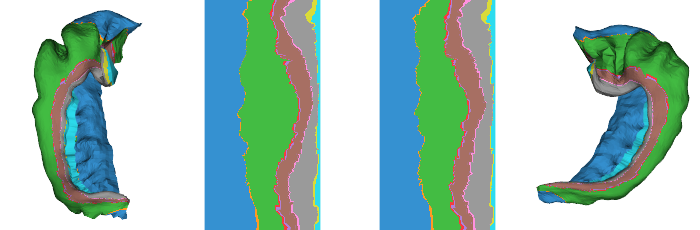

In [36]:
hippunfold_dir = '/export03/data/unfolded_registration/hippunfold_v1.3.0_100um/hippunfold'
sub = 'bbhist'
ses=''
feature = ['subfields']
den = '0p5mm'
resourcesdir = '/export03/data/opt/hippunfold_toolbox/resources'
modality = 'corobl'


importlib.reload(utils)
importlib.reload(plotting)
plotting.surfplot_sub_foldunfold(hippunfold_dir, sub, ses, feature, labels=['hipp'], modality='corobl', cmap='tab10', embed_nb=True)

/data/mica3/BIDS_MICs/derivatives/hippunfold_v1.3.0/hippunfold/sub-HC001/ses-01/surf/sub-HC001_ses-01_hemi-L_space-T1w_den-0p5mm_label-dentate_thickness.shape.gii
/data/mica3/BIDS_MICs/derivatives/hippunfold_v1.3.0/hippunfold/sub-HC001/ses-01/surf/sub-HC001_ses-01_hemi-R_space-T1w_den-0p5mm_label-dentate_thickness.shape.gii


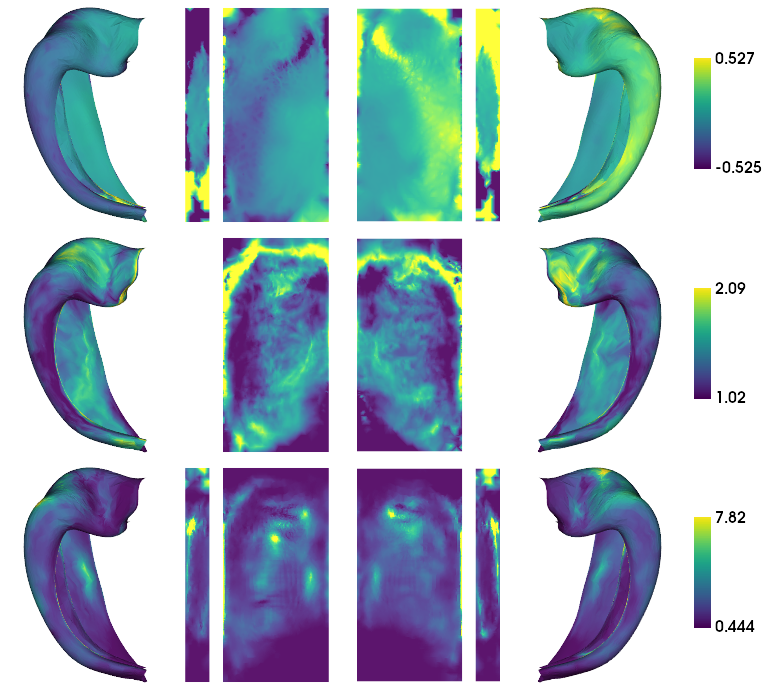

In [37]:
hippunfold_dir = '/data/mica3/BIDS_MICs/derivatives/hippunfold_v1.3.0/hippunfold'
subs = ['sub-HC001']
ses='ses-01'
features = ['curvature', 'thickness', 'gyrification']
hemis = ['L','R']
labels=['hipp','dentate']
den = 'den-0p5mm'
size=[400,200]
resourcesdir = '/export03/data/opt/hippunfold_toolbox/resources'

ind = [range(7262), range(7262,7262+1788)]
hipp_dat = np.zeros([7262+1788,2,len(subs),len(features)])*np.nan
for f,feature in enumerate(features):
    for s,sub in enumerate(subs):
        for h,hemi in enumerate(hemis):
            for l,label in enumerate(labels):
                fn = f'{hippunfold_dir}/{sub}/{ses}/surf/'\
                                 f'{sub}_{ses}_hemi-{hemi}_space-T1w'\
                                 f'_den-0p5mm_label-{label}_{feature}.shape.gii'
                try:
                    d = nib.load(fn)
                    hipp_dat[ind[l],h,s,f] = d.darrays[0].data
                except:
                    print(fn)

importlib.reload(utils)
importlib.reload(plotting)
plotting.surfplot_canonical_foldunfold(hipp_dat[:,:,0,:], tighten_cwindow=True, embed_nb=True, color_bar='right', share='row')